# Python, Data, 2025

---

* Úvod do NUMPY,
* základy NUMPY,
    - atributy,
    - metody,
    - spojování,
    - rozdělování,
    * cvičení 1,
    * cvičení 2,
* univerzální funkce, ~ufuncs,
    - úvod
    - typy funkcí
    * cvičení 3.

## Úvod do NUMPY

---

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.QQOtOJPya2YEO6IkVBnYjQHaDV%26pid%3DApi&f=1&ipt=245c27df971ff24527ca317988f6feda8b14851ef0a889fda7d5a10d114dc5e6&ipo=images" width="300" style="margin-left:auto; margin-right:auto"/>

### Proč umět NUMPY

---

Je to univerzální knihovna pro práci **s numerickými daty** v jazyce Python.

Funkcionalita této knihovny je využívána (skrze API) v jiných knihovnách jako *Pandas*, *SciPy*, *Matplotlib*, *scikit-learn*, *scikit-image*.

<br>

Nabízí efektivní nástroje pro práci **s většími datovými strukturami**.

Usnadňuje práci se **vícerozměrnými poli** a **maticovými datovými strukturami**.

### Kde zjistit více informací

---

Dokumentaci najdeš [zde](https://numpy.org/doc/stable/index.html#).

Zdrojový kód najdeš [zde](https://github.com/numpy/numpy).

### Jak jej nainstaluji

---

Instalace knihovny obecně (doporučeno v rámci virtuálního prostředí):

In [1]:
# !pip install numpy

...nebo:

In [2]:
# !conda install numpy

<br>

Nahrávání knihovny:

In [3]:
import numpy

In [4]:
import numpy as np

In [5]:
from numpy import array

<br>

Používaná verze knihovny:

In [6]:
numpy.__version__

'1.24.4'

### Srovnání datových typů

---

Efektivní práce s daty si zakládá na tom, jak jsou data uložená.

Proto je zásadní tušit jak objekty zpracovává **klasický Python** a `numpy`.

In [7]:
x = 10
x = 10.0
x = "deset"

*Dynamické typování* v Pythonu vypadá jako dobrý nápad.

Přináší jistou flexibilitu a jednodušší používání.

Také s sebou ovšem nese jisté povinnosti, které by obyčejná proměnná **neměla normálně zpracovávat**.

V ukázce neukládáš pouze hodnoty, ale další doprovodné informace:
* **počet referencí**, kvůli alokaci/dealokaci paměti,
* **typ kódovací sady**,
* **velikost** následujících dat.

#### LIST v Pythonu

---

In [8]:
muj_list = [10, 10.0, "deset"]

In [9]:
datove_typy_listu = [type(hodnota) for hodnota in muj_list]

In [10]:
datove_typy_listu

[int, float, str]

<br>

Je jasné, že tento *komfort* sebou nese i svoji cenu.

Protože toho každá hodnota s sebou nese další doplňující informace (datový typ, kódování, ...).

I kdyby byly hodnoty stejného datové typu, přesto s sebou přenášejí řadu balastu.

Tomu se snaží knihovna `numpy` pomáhat.

In [11]:
from numpy import array

In [12]:
ciselne_pole = array(range(6))

In [13]:
ciselne_pole

array([0, 1, 2, 3, 4, 5])

In [14]:
ciselne_pole.dtype

dtype('int64')

In [15]:
type(ciselne_pole)

numpy.ndarray

<br>

Na rozdíl od datového typu`list` v jazyce Python, pole v `numpy` obsahují stejný datový typ.

Pokud tomu tak není, `numpy` provede *upcast* (představ si datovou konverzi):

In [16]:
mix_desetinne_cele_hodnoty = array((1, 2, 3, 3.1416))

In [17]:
mix_desetinne_cele_hodnoty

array([1.    , 2.    , 3.    , 3.1416])

In [18]:
mix_desetinne_cele_hodnoty.dtype

dtype('float64')

<br>

Pokud potřebuješ dodržet konkrétní datový typ, použij explicitně *parametr* `dtype`:

In [19]:
jen_cele = array((1, 2, 3, 3.1416), dtype="int64")

In [20]:
jen_cele

array([1, 2, 3, 3])

<br>

Datové typy se snaží implicitně konvertovat. Pokud je to možné.

In [21]:
# jen_cele = array((1, 2, "tři", 3.1416), dtype="int64")  # "ValueError"

In [22]:
# int("tři")  # "ValueError"

In [23]:
jen_cele

array([1, 2, 3, 3])

<br>

`numpy` nabízí obrovskou škálu rychlých a efektivních způsobů vytváření polí a manipulace s číselnými daty v nich.

Pracuje s homogenními sekvenčnímy objekty.

#### Proč používat NUMPY?

---

Pole v `numpy` jsou rychlejší a kompaktnější než `list` v Pythonu.

Pole spotřebovává **méně paměti a pohodlně se používá** (určení datových typů,..).

```
Země   Počet obyv.   Rozloha
česká republika 11  75
německo         22  115
rakousko        15  70
```

In [24]:
import numpy as np
from pandas import DataFrame

In [25]:
zeme_df = DataFrame(
    data=[[11, 79], [66, 243], [196, 924]],
    index=["CZE", "UK", "Nigeria"],
    columns=["population", "surface_area"]
)

In [26]:
zeme_df

,population,surface_area
CZE,11,79
UK,66,243
Nigeria,196,924


In [27]:
zeme_arr = np.array(zeme_df)

In [28]:
zeme_arr

array([[ 11,  79],
       [ 66, 243],
       [196, 924]])

In [29]:
zeme_arr.dtype

dtype('int64')

<br>

## Základy NUMPY

---

Protože je `numpy` postaven na jazyku C, přebírá také podobné datové typy.

Některé datové typy:
    
| Datový typ v `numpy` | Popis |
| :- | :- |
| `bool_` | boolean `True`, `False` |
| `int16` | celá čísla (bajty od -32768 do 32767) |
| `int32` | celá čísla (bajty od -2147483648 do 2147483647)) |
| `int64` | celá čísla (bajty od -9223372036854775808 to 9223372036854775807) |
| `float64` | desetinné čísla |
| `complex64` | komplexní čísla, reprezentovaná dvěma 64-bitovými dese. čísly |

<br>

Dále `numpy` poskytuje `array` objekty.

In [30]:
muj_list = [1, 2, 3]                      # 1D
muj_2D_list = [[1, 2], [3, 4]]            # 2D pole == matice

Ty slouží jako prostředky pro elegantní manipulaci s daty (znáš z `pandas`).

Základní operace pro `array`:
* **atributy**,
* **indexování**,
* **řezání**,
* **RESHAPE**,
* **JOIN** a **MERGE** --> *konkatenace*, *split*

### Vytvoření ARRAY

---

In [31]:
import numpy as np

<br>

#### Jak vytvořit array pomocí built-in sekvencí?

---

Můžeš jednoduše konvertovat built-in datové typy v Pythonu na `numpy` pole:

In [32]:
muj_range = range(3)
muj_list = [3, 4, 5]
muj_tuple = (6, 7, 8)

In [33]:
muj_list_arr = np.array(muj_list)
muj_tuple_arr = np.array(muj_tuple)
muj_range_arr = np.array(muj_range)

In [34]:
muj_list_arr

array([3, 4, 5])

In [35]:
type(muj_list_arr)

numpy.ndarray

<br>

Atribut `dtype` neví nic o datovém typu objektu, jen jakým objekty je naplněný:

In [36]:
muj_list_arr.dtype

dtype('int64')

In [37]:
isinstance(muj_list_arr, np.ndarray)

True

In [38]:
type(muj_tuple_arr)

numpy.ndarray

<br>

#### Jak vytvořit array pomocí nul?

---

In [39]:
jen_nuly = np.zeros([2, 5])  # Royal (rows) Crown (columns) cola 

In [40]:
jen_nuly

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [41]:
jen_nuly.dtype

dtype('float64')

<br>

Pro jiný datový typ je potřeba explicitně zadat hodnotu:

In [42]:
jen_nuly = np.zeros([2, 5], dtype='int64')  # Royal (rows) Crown (columns) cola 

In [43]:
jen_nuly

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

<br>

#### Jak vytvořit array pomocí jedniček?

---

In [44]:
jen_jednicky = np.ones(shape=(2, 3), dtype=int)

Definice nového pole je možná i s klíčovými argumenty (parametr `shape`).

In [45]:
# np.ones?

In [46]:
jen_jednicky.dtype

dtype('int64')

In [47]:
jen_jednicky

array([[1, 1, 1],
       [1, 1, 1]])

<br>

#### Jak vytvořit array pomocí defaultní výplňové hodnoty?

---

In [48]:
jen_pi = np.full(shape=(3, 5), fill_value=np.pi)  # math, math.pi

In [49]:
jen_pi

array([[3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265]])

<br>

#### Jak vytvořit array pomocí rozsahů?

---

Velmi intuitivně zadavaná datová struktura, podobně jako u Python `range`:

In [50]:
interval_arr = np.arange(start=0, stop=10, step=1)

In [51]:
interval_arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [52]:
type(interval_arr)

numpy.ndarray

In [53]:
interval_arr.dtype

dtype('int64')

<br>

Narozdíl od standardní knihovny umí `numpy` arrange objekt tvořit intervaly i s pomocí desetinných čísel.

In [54]:
interval_arr = np.arange(start=0, stop=1, step=0.1, dtype='float64')

In [55]:
interval_arr

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

<br>

#### Jak vytvořit array pomocí náhodných celých čísel?

---

In [56]:
# from random import randint

In [57]:
random_hodnoty = np.random.randint(low=0, high=6, size=(2, 4))

In [58]:
random_hodnoty

array([[5, 2, 0, 1],
       [5, 4, 5, 4]])

In [59]:
type(random_hodnoty)

numpy.ndarray

In [60]:
poradi = len(range(10))  # 10

<br>

Občas je vhodnější tvořit rozsahy dynamicky, než statickou (hárdkódovanou) hodnotou:

In [61]:
random_hodnoty = np.random.randint(low=0, high=66, size=poradi)

In [62]:
tuple(random_hodnoty)

(59, 63, 6, 43, 18, 44, 0, 61, 12, 12)

<br>

#### Jednodimenzionální pole

---

In [63]:
m1 = np.random.randint(low=1, high=10, size=6)

In [64]:
m1

array([1, 6, 1, 2, 9, 3])

<br>

Tedy prakticky jednoduché pole, které se na první pohled neliší tolik od `list`.

In [65]:
import time
import numpy as np

# Velikost pole
N = 10_000_000

# List
lst = list(range(N))
start = time.time()
lst = [x * 2 for x in lst]
print("List:", time.time() - start)

# NumPy
arr = np.arange(N)
start = time.time()
arr = arr * 2
print("NumPy:", time.time() - start)

List: 0.8010213375091553
NumPy: 0.01711726188659668


Numpy nebudeš potřebovat, pokud:
- pokud zpracováváš malá nebo smíšená data (např. `[1, "jablko", True]`)
- pokud nepoužíváš numerické výpočty

#### Dvoudimenzionální pole

---

In [66]:
m2 = np.random.randint(10, size=(2, 3))

In [67]:
m2

array([[7, 0, 6],
       [6, 9, 3]])

<br>

Definicí oznamuješ:
1. `10`, vyber náhodné celé čísla z intervalu `0-9`,
2. vytvoř **2 řádky**,
3. .. o **3 sloupcích**.

#### Třídimenzionální pole

---

In [68]:
m3 = np.random.randint(10, size=(2, 3, 4))  # implicitní zadání "high"

In [69]:
m3

array([[[8, 0, 1, 3],
        [3, 3, 3, 0],
        [6, 9, 1, 2]],

       [[2, 2, 4, 6],
        [2, 8, 7, 3],
        [5, 7, 3, 4]]])

<br>

Definicí oznamuješ:
1. `10`, vyber náhodné celé čísla z intervalu `0-9`,
2. vytvoř **2 matice**,
3. .. o **3 řádcích**,
4. .. a **4 sloupcích**.

<br>

### Dostupné atributy pro ARRAY objekt

---



Pokud budeš potřebovat prozkoumat existující `array`, můžeš vyzkoušet tyto atributy a metody:
1. **Dimenze**,
2. **tvar**,
3. **velikost**,
4. **datové typy**,
5. **bajtová velikost**.

#### Dimenze matice

---

Kontrola, zda máš vektor, matici nebo vícerozměrné pole.

In [70]:
m3.ndim

3

In [71]:
m2.ndim

2

Potřebné pokud chceš:
- přizpůsobení vstupu modelům (např. reshape pro strojové učení).
- zpracování obrázků (např. RGB obrázek má ndim == 3, černobílý ndim == 2).

<br>

#### Tvar matice

---

Vrací tuple s počtem prvků v každé dimenzi.

In [72]:
m3.shape

(2, 3, 4)

In [73]:
m2.shape

(2, 3)

In [74]:
m2

array([[7, 0, 6],
       [6, 9, 3]])

Kdy to potřebuješ?
- Reshape dat pro vstup do neuronových sítí (`X.reshape(-1, 1)`)
- Slučování (concatenace) polí – kontrola rozměrů
- U obrázků: (výška, šířka, kanály)

Obdoba, pomocí které řešíš rozměry tabulky v knihovně `pandas`.

<br>

#### Velikost matice

---

Atribut zobrazí celkový počet prvků v poli.

Kdy to potřebuješ?
- Výpočty, kde ti nezáleží na tvaru, ale jen na počtu dat
- Pro porovnání velikosti datových struktur
- Iterace přes všechny prvky

In [75]:
m3.size

24

<br>

#### Datový typ

---

In [76]:
m3.dtype

dtype('int64')

<br>

#### Velikost v bajtech

---

Kdy to potřebuješ?

- Když sleduješ **paměťovou náročnost** dat (např. u velkých datasetů)
- **Optimalizace výkonu** – kolik paměti si objekt žádá
- **V datové analytice / streamování** – odhad kolik se vejde do RAM nebo bufferu

In [77]:
m3.nbytes

192

In [78]:
arr = np.ones((1000, 1000), dtype=np.float64)

In [79]:
print(arr.nbytes)  # 8 000 000 bajtů = 8 MB

8000000


<br>

Jde o součin atributů **size** * **itemsize**.

<br>

### Indexování ARRAY

---



Postup vypadá podobně jako pro sekvenční datové typy v Pythonu.

Pomocí hranaté závorky a celého čísla, můžeš zpřístupnit konkrétní hodnotu/ hodnoty.

<br>

#### Jednodimenzionální

In [80]:
m1

array([1, 6, 1, 2, 9, 3])

In [81]:
m1[0]

1

In [82]:
m1[1]

6

In [83]:
m1[-1]

3

<br>

#### Dvoudimenzionální

In [84]:
m2

array([[7, 0, 6],
       [6, 9, 3]])

In [85]:
m2[0]

array([7, 0, 6])

In [86]:
m2[0][0]

7

In [87]:
m2[0, 0]

7

<br>

Pomocí indexů zpřístupníš hodnotu na konkrétní pozici a můžeš ji modifikovat:

In [88]:
m2

array([[7, 0, 6],
       [6, 9, 3]])

In [89]:
el_m2 = m2[0, 0]

In [90]:
el_m2

7

In [91]:
m2[0, 0] = 11

In [92]:
m2

array([[11,  0,  6],
       [ 6,  9,  3]])

<br>

Dávej pozor na datové typy. Pokud budeš chtít přidat jiný datový typ:

In [93]:
m2[0, 0] = 11.111

In [94]:
m2

array([[11,  0,  6],
       [ 6,  9,  3]])

Výsledek bude na pozadí *truncatovaný*.

In [95]:
# m2[0, 0] = "jedenáct"  # "ValueError"

<br>

### Slicing ARRAY

---



Podobně jako u zpřístupňování jednotlivých hodnot, můžeš tvořit *subarrays*.

Postup je opět velmi podobný pro *slicing* u sekvenčních hodnot.

Je doporučené udávat všechny argumenty, protože implicitní dosazování defaultních hodnot může mást uživatele.

In [96]:
zeme_arr

array([[ 11,  79],
       [ 66, 243],
       [196, 924]])

In [97]:
zeme_arr[0:2]

array([[ 11,  79],
       [ 66, 243]])

In [98]:
zeme_arr[-2:]

array([[ 66, 243],
       [196, 924]])

<br>

Pro více dimenzí, dva řádky a jeden sloupec:

In [99]:
dva_radky_jeden_sloupec = zeme_arr[:2, :1]

In [100]:
dva_radky_jeden_sloupec

array([[11],
       [66]])

In [101]:
dva_radky_jeden_sloupec = zeme_arr[::2, :1]

In [102]:
dva_radky_jeden_sloupec

array([[ 11],
       [196]])

<br>

Pokud pracuješ se *subarrays*, používáš pohledy originální hodnoty.

V Pythonu to byla většinou kopie, původního objektu:

In [103]:
dva_radky_jeden_sloupec

array([[ 11],
       [196]])

In [104]:
dva_radky_jeden_sloupec[0, 0] = 13

In [105]:
dva_radky_jeden_sloupec

array([[ 13],
       [196]])

In [106]:
zeme_arr

array([[ 13,  79],
       [ 66, 243],
       [196, 924]])

<br>

Pokud potřebuješ přesto nachystat kopii a ponechat původní hodnoty nezměněné, vyzkoušej metodu `copy`:

In [107]:
kopie_dva_radky_jeden_sloupec = zeme_arr[:2, :1].copy()

In [108]:
kopie_dva_radky_jeden_sloupec

array([[13],
       [66]])

In [109]:
kopie_dva_radky_jeden_sloupec[0, 0] = 22

In [110]:
kopie_dva_radky_jeden_sloupec

array([[22],
       [66]])

In [111]:
zeme_arr

array([[ 13,  79],
       [ 66, 243],
       [196, 924]])

<br>

### Přetváření ARRAY

---



Jestli budeš potřebovat změnit tvar pole nebo matice, vyzkoušej metodu `reshape`:

In [112]:
zeme_df

,population,surface_area
CZE,11,79
UK,66,243
Nigeria,196,924


In [113]:
zeme_arr[0, 0] = 11

In [114]:
zeme_arr

array([[ 11,  79],
       [ 66, 243],
       [196, 924]])

<br>

Vytvoříš si jednodimenzionální pole s pomocí funkce `arange`:

In [115]:
pole_1D = np.arange(1, 11)

In [116]:
pole_1D

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

<br>

Nachystám 2D pole, matici, pomocí metody `reshape`:

In [117]:
matice = pole_1D.reshape(2, 5)

In [118]:
matice

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

<br>

Pomocí metody `reshape` můžeš také měnit **řádkový vektor za sloupcový**:

In [119]:
import numpy as np

In [120]:
radkovy_vektor = np.array((11, 22, 33, 44))

In [121]:
radkovy_vektor

array([11, 22, 33, 44])

In [122]:
r =  radkovy_vektor[np.newaxis, :]

In [123]:
r

array([[11, 22, 33, 44]])

In [124]:
r.T

array([[11],
       [22],
       [33],
       [44]])

In [125]:
radkovy_vektor[:, np.newaxis]

array([[11],
       [22],
       [33],
       [44]])

In [126]:
x = np.expand_dims(radkovy_vektor, axis=1)

In [127]:
x = np.expand_dims(radkovy_vektor, axis=0)

In [128]:
# np.expand_dims?

In [129]:
x

array([[11, 22, 33, 44]])

#### Ukázka

---

Potřebuješ převést 1D pole na 2D matici, kde budeš mít 7 hodnot na řádek.

In [130]:
temp_data = np.random.uniform(15, 36, size=30*7)  # 1D

In [131]:
# temp_data

In [132]:
temp_data.shape

(210,)

In [133]:
temp_data.ndim

1

In [134]:
############ Po Ut St Ct Pa So Ne
#01. tyden
#02. tyden
#03.
#...

In [135]:
# temp_data.reshape(2, 7)  # ValueError

Opatrně na nesoulad hodnot.

Tvůj původní array má **210 prvků → tedy `size` = 210**

Při `reshape(2, 7)` říkáš:
*"Chci z těchto dat vytvořit matici 2 řádků a 7 sloupců"*

Ale **2 × 7 = 14** → a **14 ≠ 210**/

Proto interpret oznamuje chybu, protože velikosti nesouhlasí.

Pokud zadáš argument `-1` udělá interpret 2D matici, kde každý řádek má 7 sloupců — a `numpy` dopočítá, kolik těch řádků je potřeba.“

In [136]:
temp_data.reshape(-1, 7)

array([[17.22758886, 35.16122782, 24.15319522, 17.57750422, 22.68221575,
        34.24284033, 18.66086761],
       [29.65272484, 17.98451801, 24.08359574, 22.56772823, 25.96975084,
        28.31121422, 30.36230326],
       [29.18711338, 29.38501925, 27.81416731, 30.57286689, 15.26417236,
        18.7822324 , 26.8890468 ],
       [16.77374375, 25.62734994, 31.0183517 , 18.32916713, 20.60390592,
        34.78797192, 17.2793474 ],
       [24.78143898, 26.07648077, 31.06395879, 31.21870633, 32.17694156,
        15.43683697, 22.33351623],
       [25.34645942, 24.50285117, 24.35493329, 30.44305455, 18.12313568,
        20.36201345, 30.6119505 ],
       [15.3696798 , 23.32738809, 32.79131825, 17.51740782, 26.01313713,
        34.57467136, 33.12863376],
       [22.23614173, 34.50898539, 17.88844648, 25.21477977, 19.84523977,
        28.45476484, 29.36089647],
       [19.81944834, 28.11821273, 15.32988222, 16.68379834, 30.86592438,
        33.73603924, 28.4245376 ],
       [25.47293107, 26.3948

In [137]:
tydenni_temp_data = temp_data.reshape(-1, 7)

In [138]:
tydenni_temp_data.shape

(30, 7)

In [139]:
tydenni_temp_data.ndim

2

<br>

### Spojování a rozdělování

---



Předchozí ukázky se vztahovaly pouze k jednomu poli, k jedné matici.

Teď uvidíš, jak můžeš kombinovat několik těchto typů objektu.

#### Spojování

Pomocí metody `concatenate` spojíš dvě pole nebo dvě matice nebo více objektů:

In [140]:
pole_1 = np.arange(1, 6)
pole_2 = np.array((6, 7, 8))

In [141]:
pole_1

array([1, 2, 3, 4, 5])

In [142]:
pole_2

array([6, 7, 8])

In [143]:
# spojene_pole = np.concatenate(pole_1, pole_2)  # TypeError

In [144]:
spojene_pole = np.concatenate([pole_1, pole_2])

In [145]:
spojene_pole

array([1, 2, 3, 4, 5, 6, 7, 8])

In [146]:
pole_2D_1 = np.random.randint(low=-15, high=15, size=(3, 2))

In [147]:
pole_2D_1

array([[  6,  11],
       [  4,  12],
       [  4, -11]])

In [148]:
pole_2D_2 = np.random.randint(low=-15, high=15, size=(5, 2))

In [149]:
pole_2D_2

array([[-15, -15],
       [-14,  -3],
       [ -1,  -3],
       [  6,  14],
       [  5,  -6]])

In [150]:
pole_2D_3 = np.random.randint(low=-15, high=15, size=(3, 2))

In [151]:
pole_2D_3

array([[12,  8],
       [ 0,  5],
       [ 4,  6]])

In [152]:
spojene_matice = np.concatenate([pole_2D_1, pole_2D_3], axis=1)

In [153]:
spojene_matice

array([[  6,  11,  12,   8],
       [  4,  12,   0,   5],
       [  4, -11,   4,   6]])

In [154]:
spojene_matice = np.concatenate([pole_2D_1, pole_2D_2], axis=0)

In [155]:
spojene_matice

array([[  6,  11],
       [  4,  12],
       [  4, -11],
       [-15, -15],
       [-14,  -3],
       [ -1,  -3],
       [  6,  14],
       [  5,  -6]])

<br>

Pokud nemáš pole nebo matice stejného rozměru, je lepší pracovat s funkcemi:
1. `vstack`, vertikální napojení,
2. `hstack`, horizontální napojení,

In [156]:
pole_1

array([1, 2, 3, 4, 5])

In [157]:
pole_2D_1

array([[  6,  11],
       [  4,  12],
       [  4, -11]])

In [158]:
# rozsirene_2D = np.concatenate([pole_1, pole_2D_1])  # ValueError

In [159]:
# rozsirene_2D = np.vstack([pole_1, pole_2D_1])  # ValueError

In [160]:
rozsirene_2D = np.vstack([pole_1[:2], pole_2D_1])

In [161]:
rozsirene_2D

array([[  1,   2],
       [  6,  11],
       [  4,  12],
       [  4, -11]])

#### Rozdělování

Opakem spojování polí a matic je rozdělování, které je možné provést pomocí funkcí:
1. `split`,
2. `hsplit`,
3. `vsplit`

In [162]:
rada_arr = np.random.randint(low=100, high=200, size=(12))

In [163]:
rada_arr.size

12

In [164]:
rada_arr

array([103, 117, 194, 174, 179, 122, 140, 136, 146, 128, 130, 192])

In [165]:
r1, r2, r3 = np.split(rada_arr, [4, 8])

In [166]:
r1, r2, r3

(array([103, 117, 194, 174]),
 array([179, 122, 140, 136]),
 array([146, 128, 130, 192]))

Takže dělení probíhá pomocí dělících indexů.

Tedy máš vždy N indexů a N + 1 polí.

In [167]:
matice = rada_arr.reshape(3, 4)

In [168]:
matice

array([[103, 117, 194, 174],
       [179, 122, 140, 136],
       [146, 128, 130, 192]])

In [169]:
leve_sl, prave_sl = np.hsplit(matice, 2)

In [170]:
leve_sl

array([[103, 117],
       [179, 122],
       [146, 128]])

In [171]:
prave_sl

array([[194, 174],
       [140, 136],
       [130, 192]])

In [172]:
# leve_sl, prave_sl = np.hsplit(matice, 3)  # ValueError

In [173]:
# prvni_sl, druhy_sl, treti_sl = np.hsplit(matice, 3) # ValueError

In [174]:
prvni_sl, druhy_sl, treti_sl, ctvrty_sl = np.hsplit(matice, 4)

In [175]:
prvni_sl, druhy_sl, treti_sl, ctvrty_sl

(array([[103],
        [179],
        [146]]),
 array([[117],
        [122],
        [128]]),
 array([[194],
        [140],
        [130]]),
 array([[174],
        [136],
        [192]]))

<br>

##### **🧠 CVIČENÍ 🧠, procvič si základy v NUMPY**

In [176]:
import numpy

#### Použij NUMPY funkci, která vytvoří 1D pole od 5, do 50 po 5ti

<details>
    <summary>▶️ Řešení</summary>
    
    ```python
    np.arange(5, 51, 5)
    ```
</details>

#### Jak vytvoříš stejné pole pomocí funkce RANGE a LIST?

<details>
    <summary>▶️ Řešení</summary>
    
    ```python
    np.array([cislo for cislo in range(5, 51, 5)])
    ```
</details>

#### Jak můžeš vytvořit pole z kapitálek písmen od A do Z?

<details>
    <summary>▶️ Řešení</summary>
    
    ```python
    np.array([chr(index) for index in range(ord("A"), ord("Z") + 1)])
    ```
</details>

#### Jak můžeš vytvořit 1D pole z 6ti náhodných čísel od 1 do 10 (včetně 10)?

<details>
    <summary>▶️ Řešení</summary>
    
    ```python
    np.random.randint(1, 10, size=6)
    ```
</details>

#### Jak vytvoříš 2D matici 4 x 5 pole s náhodnými čísly od 1 do 50 (včetně 50)?

<details>
    <summary>▶️ Řešení</summary>
    
    ```python
    numpy.random.randint(1, 51, size=(4, 5))
    ```
</details>

<br>

##### **🧠 CVIČENÍ 🧠, procvič si základy v NUMPY**

Máš teplotní záznamy získané ze dvou různých meteorologických stanic.

Každá stanice poskytuje teplotní záznamy za posledních 10 dní, které jsou uloženy ve formátu seznamu. Tvým úkolem je:

In [177]:
import numpy as np

In [178]:
stanice_c1_teploty = [21.5, 22.3, 20.7, 19.8, 23.1, 22.6, 20.4, 21.8, 22.9, 21.2]
stanice_c2_teploty = [18.5, 19.1, 18.7, 17.8, 21.3, 20.6, 18.5, 19.7, 20.5, 19.2]

#### Převeď seznamy teplot na NumPy pole.

#### Spoj oba záznamy do jednoho pole pomocí funkce 'concatenate'.

#### Rozděl sloučené pole na dvě části: prvních 5 dní a druhých 5 dní.

#### Vypočítej průměrnou teplotu pro prvních 5 dní a druhých 5 dní.

#### Motivace: grafický výstup

---

In [179]:
import numpy as np
import matplotlib.pyplot as plt

In [180]:
arr = np.array([
    [21.5, 22.3, 20.7, 19.8, 23.1, 22.6, 20.4, 21.8, 22.9, 21.2],
    [18.5, 19.1, 18.7, 17.8, 21.3, 20.6, 18.5, 19.7, 20.5, 19.2]
])

In [181]:
a, b = np.hsplit(arr, 2)  # rozdělení na 2 části podle sloupců (každá má 5)

In [182]:
# Vykreslení
plt.figure(figsize=(8, 4))

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

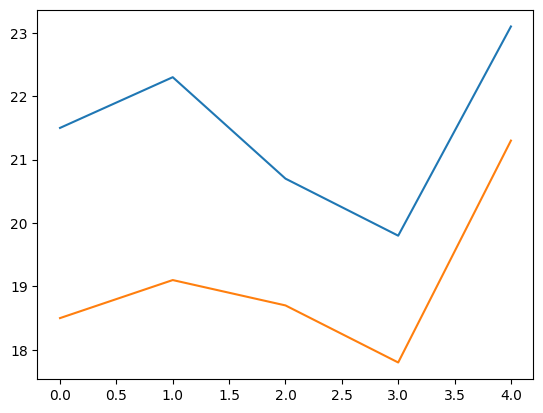

In [183]:
# Část A
plt.plot(a[0], label='S1 – prvních 5 dní')
plt.plot(a[1], label='S2 – prvních 5 dní')

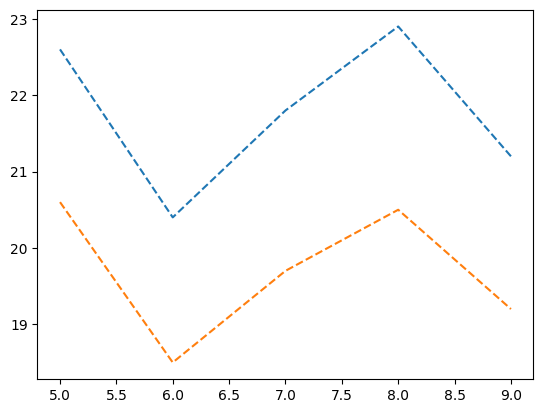

In [184]:
# Část B
plt.plot(range(5, 10), b[0], '--', label='S1 – druhých 5 dní')
plt.plot(range(5, 10), b[1], '--', label='S2 – druhých 5 dní')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


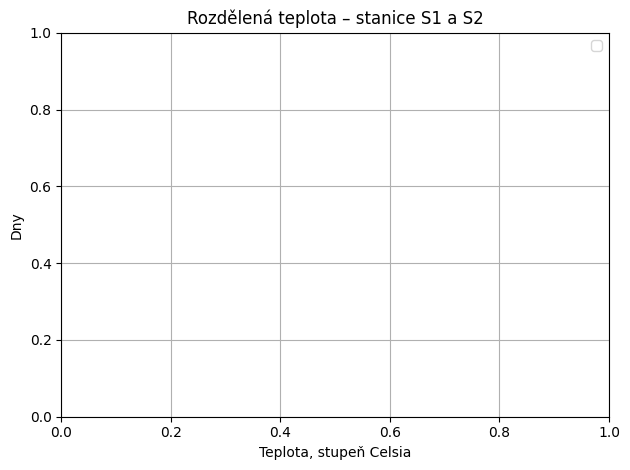

In [185]:
plt.title("Rozdělená teplota – stanice S1 a S2")
plt.xlabel("Teplota, stupeň Celsia")
plt.ylabel("Dny")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<details>
    <summary>▶️ Řešení</summary>

```python
stanice_c1_teploty = [21.5, 22.3, 20.7, 19.8, 23.1, 22.6, 20.4, 21.8, 22.9, 21.2]
stanice_c2_teploty = [18.5, 19.1, 18.7, 17.8, 21.3, 20.6, 18.5, 19.7, 20.5, 19.2]

stanice_c1_teploty_pole = np.array(stanice_c1_teploty)
stanice_c2_teploty_pole = np.array(stanice_c2_teploty)

spojene_teploty = np.concatenate((stanice_c1_teploty_pole, stanice_c2_teploty_pole))

upraveny_tvar = spojene_teploty.reshape(2, 10)
prvnich_pet_dni, dalsich_pet_dni = np.hsplit(upraveny_tvar, 2)

prumer_prvnich_deset_dni = np.mean(prvnich_deset_dni)
prumer_druhych_deset_dni = np.mean(dalsich_deset_dni)
```
</details>

<br>

## Univerzální funkce, UFUNCS

---

Výpočty na polích a maticích `numpy` mohou být **velmi rychlé** nebo **velmi pomalé**.

Klíčem k rychlé práci, je použití vektorizovaných operací, které jsou obvykle implementovány prostřednictvím *univerzálními funkcemi*.

Jde tedy o funkce, které pracují na objektech polí a matic, prvek po prvku.
Umožňují efektivní operace na polích, což vede k výrazně rychlejším výsledkům než pomocí běžných **Pythonových funkcí a cyklů**.

Ukázkou může být sčítání hodnot pro dvě dlouhé matice:

In [186]:
import numpy as np

In [187]:
pole_1 = np.random.randint(1, 100, size=10_000_000)

In [188]:
pole_2 = np.random.randint(100, 255, size=10_000_000)

In [189]:
pole_a = np.array([1, 2 ,3])
pole_b = np.array([4, 4, 4])

In [190]:
pole_a + pole_b

array([5, 6, 7])

<br>

Pro sečtení hodnot z obou polí můžeš pracovat s funkce `add`:

In [191]:
%timeit result_loop = [x + y for x, y in zip(pole_1, pole_2)]

1.45 s ± 90.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [192]:
%timeit secteno_ufuncs = np.add(pole_1, pole_2)

22.7 ms ± 1.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<br>

Můžeš si všimnout, že řešení s výstupem v `secteno_ufuncs` je skoro 5~10x rychlejší.

<br>

Z důvodů použití dynamického, interpretovaného jazyka v rámci CPythonu ti jeho flexibilita neumožní kompilovat jednotlivé operace až na efektivní strojový kód (`01101101110101`).

Určitě existují derivace projektů jako *PyPy*, *Cython*, *Numba*.

### Úvod do UFUNCS

---

Pro mnoho typů operací poskytuje `numpy` praktické rozhraní právě pro tento typ operací,
staticky typované, zkompilované rutiny.

Jedná se o tzv. **vektorizované operace**.

Pro aplikace takových funkcí můžeš jednoduše vybrat konkrétní funkci a aplikovat ji na pole.

In [193]:
pole_3 = np.arange(10)

In [194]:
pole_4 = np.arange(11, 21)

In [195]:
pole_3, pole_4

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20]))

In [196]:
pole_3 / pole_4

array([0.        , 0.08333333, 0.15384615, 0.21428571, 0.26666667,
       0.3125    , 0.35294118, 0.38888889, 0.42105263, 0.45      ])

<br>

Počítání přes **ufuncs** je téměř pokaždé efektivnější než aplikace např. obyčejných smyček v Pythonu.

Kromě klasických operátorů, můžeš aplikovat samotné funkce:

In [197]:
np.divide(pole_3, pole_4)

array([0.        , 0.08333333, 0.15384615, 0.21428571, 0.26666667,
       0.3125    , 0.35294118, 0.38888889, 0.42105263, 0.45      ])

<br>

Výpis některých UFUNCS:

| Operátor | Jméno funkce | Popis |
| :- | :- | :- |
| `+` |  `np.add` |  Sčítání (př., `1 + 1 = 2` ) |
| `-` |  `np.subtract` | odčítání (př., `3 - 2 = 1` ) | 
| `-` | `np.negative` |  unární negace (př., `-2` ) | 
| `*` | `np.multiply` |  násobení (př., `2 * 3 = 6` ) |
| `/` | `np.divide` |  dělení (př., `3 / 2 = 1.5` ) |
| `//` |  `np.floor_divide` | celočíselné dělení (př., `3 // 2 = 1` ) |
| `**` | `np.power` | umocňování (př., `2 ** 3 = 8` ) | 
| `%` | `np.mod` | modulo (př., `9 % 4 = 1` ) |

<br>

Další kombinací můžeš pracovat třeba **s absolutními hodnotami**:

In [198]:
negativni_cisla = np.array((-5, -4, -3, -2, -1))

In [199]:
abs(negativni_cisla)

array([5, 4, 3, 2, 1])

In [200]:
type(abs)

builtin_function_or_method

<br>

Pomocí ufuncs použiješ funkci `absolute`, která je ekvivalentem v rámci `numpy`:

In [201]:
np.absolute(negativni_cisla)

array([5, 4, 3, 2, 1])

<br>

Práce s **exponenty** a **umocňování**:

In [202]:
ciselne_hodnoty = np.arange(6)

In [203]:
ciselne_hodnoty

array([0, 1, 2, 3, 4, 5])

In [204]:
np.exp2(ciselne_hodnoty)      # 2^0, 2^1, 2^2, 2^3, ...

array([ 1.,  2.,  4.,  8., 16., 32.])

In [205]:
np.power(3, ciselne_hodnoty)  # 3^0, 3^1, ...

array([  1,   3,   9,  27,  81, 243])

<br>

Knihovna `numpy` potom nabízí další specializované funkce (logaritmické, trigonometrické, aj.)

<br>

##### **🧠 CVIČENÍ 🧠, procvič si základy UFUNCS v NUMPY**

Máte prodejní data dvou obchodů za poslední 3 měsíce. Každý obchod poskytuje seznam svých prodejů za každý měsíc. Vaším úkolem je:

In [206]:
obchod_1_prodej = [1000, 1200, 1300]
obchod_2_prodej = [900, 1100, 1500]

In [207]:
# Převést seznamy prodejů na NumPy pole.
import numpy as np

In [208]:
# 1. Sloučit prodejní data obou obchodů do jednoho pole pomocí funkce concatenate

In [209]:
# 2. Rozdělit sloučené pole na dvě části, které odpovídají měsícům ..
# .. pod sebou u obou obchodů

In [210]:
# 3. Vypočítat celkový prodej pro každý měsíc

In [211]:
# 4. Vypočítat procentuální změnu mezi prvním a druhým měsícem ..
# .. a mezi druhým a třetím měsícem mezi celkovými měs. součty

<details>
    <summary>▶️ Řešení</summary>
    
```python
obchod_1_prodej = [1000, 1200, 1300]
obchod_2_prodej = [900, 1100, 1500]

import numpy as np

# 1. Sloučit prodejní data obou obchodů do jednoho pole pomocí funkce concatenate
sloucene_prodeje = np.concatenate((obchod_1_prodej_pole, obchod_2_prodej_pole))

# 2. Rozdělit sloučené pole na dvě části, které odpovídají měsícům ..
# .. pod sebou u obou obchodů
rozdelene_po_mesicich = sloucene_prodeje.reshape(2, -1)

# 3. Vypočítat celkový prodej pro každý měsíc
mesic_1, mesic_2, mesic_3 = np.hsplit(rozdelene_po_mesicich, 3)
celkem_mesice = np.array((mesic_1.sum(), mesic_2.sum(), mesic_3.sum()))

# 4. Vypočítat procentuální změnu mezi prvním a druhým měsícem ..
# .. a mezi druhým a třetím měsícem mezi celkovými měs. součty
rozdily = np.diff(celkem_mesice)
np.divide(rozdily, celkem_mesice[:2]) * 100


### ALTERNATIVA
#Vstupní data
obchod_1_prodej = [1000, 1200, 1300]
obchod_2_prodej = [900, 1100, 1500]

# Převést seznamy prodejů na NumPy pole.
obchod_1_prodej_np = np.array( obchod_1_prodej )
obchod_2_prodej_np = np.array( obchod_2_prodej )


# Sloučit prodejní data obou obchodů do jednoho pole pomocí funkce concatenate
obchody_prodej = np.concatenate( [ obchod_1_prodej_np, obchod_2_prodej_np ] )
display( obchody_prodej )

# Rozdělit sloučené pole na dvě části, které odpovídají měsícům pod sebou u obou obchodů
rozdeleni_mesice = np.reshape( obchody_prodej, (-1, 3) ).T
display( rozdeleni_mesice )

# Vypočítat celkový prodej pro každý měsíc
celkove_prodeje = rozdeleni_mesice.sum( axis = 1 )
display( celkove_prodeje )

# Vypočítat procentuální změnu mezi prvním a druhým měsícem a mezi druhým a třetím měsícem
procentualni_zmena = ( np.diff( celkove_prodeje ) / celkove_prodeje[:2] * 100 ).round( 3 )
display( procentualni_zmena )
```
</details>

---